Scipy模块依赖于Numpy,不仅可以进行矩阵运算，还可以求解线性方程组、进行积分运算和优化等。
inv:解矩阵的逆
det:计算方阵的行列式
norm:解向量的摸
eig:求特征值与特征向量
orth:求矩阵的标准正交基
lu:矩阵的LU分解
Lstsq:求最小二乘法解
Fft:傅里叶变换

In [1]:
import numpy as np

In [2]:
from scipy import interpolate
from scipy.special import jn
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
myfont=fm.FontProperties(fname=u'simsun.ttc',size=10)

In [4]:
x=np.linspace(0,10,100)

贝塞尔函数

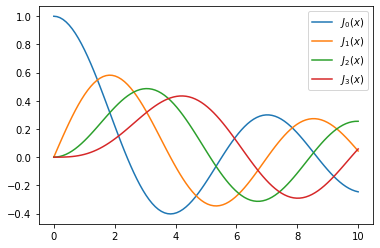

In [6]:
fig,ax=plt.subplots()
for n in range(4):
    ax.plot(x,jn(n,x),label=r"$J_%d(x)$"%n)
ax.legend()

In [7]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
x=np.linspace(-18,18,36)
noise=0.1*np.random.random(len(x))

In [10]:
signal=np.sinc(x)+noise

In [11]:
signal

array([ 0.09580709,  0.08788358, -0.00178858,  0.05206593,  0.04132151,
        0.03041971,  0.03145074,  0.02214919,  0.07206817,  0.06114328,
        0.06402566,  0.08564347, -0.02170917,  0.14976634, -0.02230916,
        0.14739449, -0.20098224,  0.63631046,  0.70961359, -0.17195444,
        0.14878866,  0.00621365,  0.12509893,  0.02532104,  0.12992559,
        0.06054152,  0.12011421,  0.0066189 ,  0.05263329, -0.01293464,
        0.06389355,  0.0056267 ,  0.0890359 ,  0.04080937,  0.02417513,
        0.00629975])

生成一次差值函数

In [13]:
interpreted=interpolate.interp1d(x,signal)

In [14]:
x2=np.linspace(-18,18,180)

In [16]:
y=interpreted(x2)


生成三次差值函数

In [17]:
cubic=interpolate.interp1d(x,signal,kind='cubic')
y2=cubic(x2)

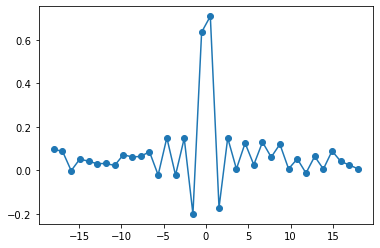

In [18]:
plt.plot(x,signal,marker='o',label='data')

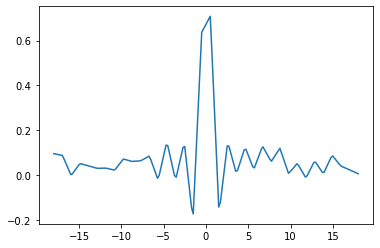

In [19]:
plt.plot(x2,y,linestyle='-',label='linear')

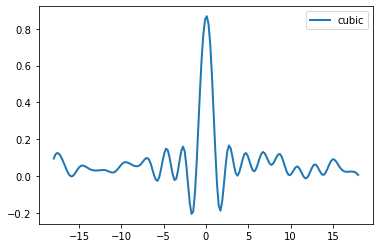

In [24]:
plt.plot(x2,y2,'-',lw=2,label='cubic')
plt.legend()
plt.show()

傅里叶变换

In [25]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
x=np.linspace(0,1,1400)

In [29]:
y=7*np.sin(2*np.pi*180*x)+2.8*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)

In [30]:
np.sin(2*np.pi*600*x)

array([ 0.00000000e+00,  4.32148753e-01, -7.79425510e-01, ...,
        7.79425510e-01, -4.32148753e-01, -2.03801035e-13])

In [31]:
yy=fft(y)#快速傅里叶变换

In [32]:
yreal=yy.real#获取实数部分

In [33]:
yimag=yy.imag#获取虚数部分

In [36]:
yf=abs(yy)#取绝对值
yf1=yf/len(x)#归一化处理
yf2=yf1[range(int(len(x)/2))]#由于对称性，只取一半区间

In [37]:
xf=np.arange(len(y))
xf1=xf
xf2=xf[range(int(len(x)/2))]

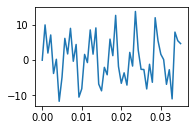

In [39]:
plt.subplot(221)
plt.plot(x[0:50],y[0:50])
#plt.title('原始波形',fontproperties=myfont)

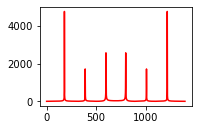

In [41]:
plt.subplot(222)
plt.plot(xf,yf,'r')


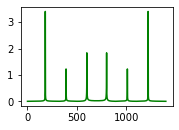

In [42]:
plt.subplot(223)
plt.plot(xf1,yf1,'g')


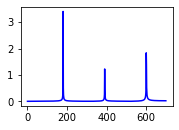

In [43]:
plt.subplot(223)
plt.plot(xf2,yf2,'b')